In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import time
import urllib.request
import utils

In [2]:
def load_problem_instance(url):
	qap_instance_file = urllib.request.urlopen(url)

	line = qap_instance_file.readline()
	n = int(line.decode()[:-1].split()[0])
	print('Problem size: %d' % n)

	def read(n):
		M = np.empty((n, n))
		for i in range(n):
			values = []
			while len(values) < n:
				line = qap_instance_file.readline()
				values.extend(list(map(int, line.decode()[:-1].split())))
			M[i, :] = values
		return M

	A = read(n)
	print('Flow matrix:\n', A.shape)

	B = read(n)
	print('Distance matrix:\n', B.shape)

	def f(p):
		s = 0.0
		for i in range(n):
			s += (A[i, :] * B[p[i], p]).sum()
		return s
	return n, f

In [3]:
QAPLIB_URL = 'https://www.opt.math.tugraz.at/qaplib/data.d/'
instances = dict.fromkeys((
	"nug12", "nug14", "nug15", "nug16a", "nug16b", "nug17", "nug18", "nug20", "nug21", "nug22", "nug24", "nug25", "nug27", "nug30",
	"tai50a", "tai60a", "tai80a"
))

In [4]:
from SGA import Mutation, Crossover, simple_genetic_algorithm

Problem size: 12
Flow matrix:
 (12, 12)
Distance matrix:
 (12, 12)


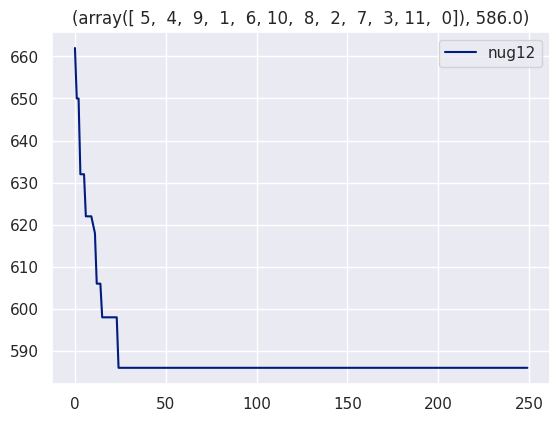

Problem size: 14
Flow matrix:
 (14, 14)
Distance matrix:
 (14, 14)


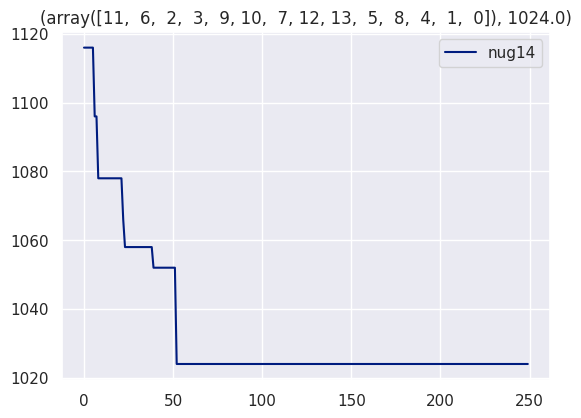

Problem size: 15
Flow matrix:
 (15, 15)
Distance matrix:
 (15, 15)


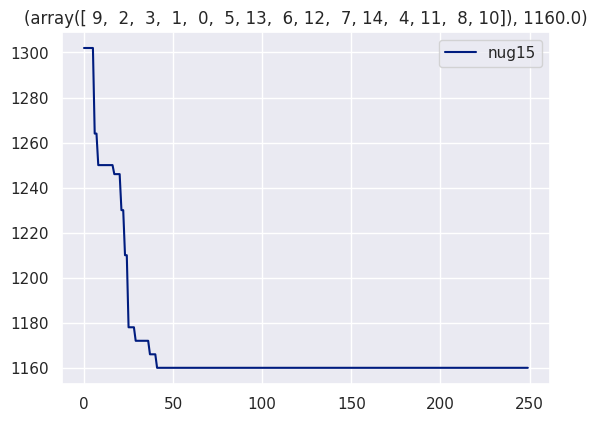

Problem size: 16
Flow matrix:
 (16, 16)
Distance matrix:
 (16, 16)


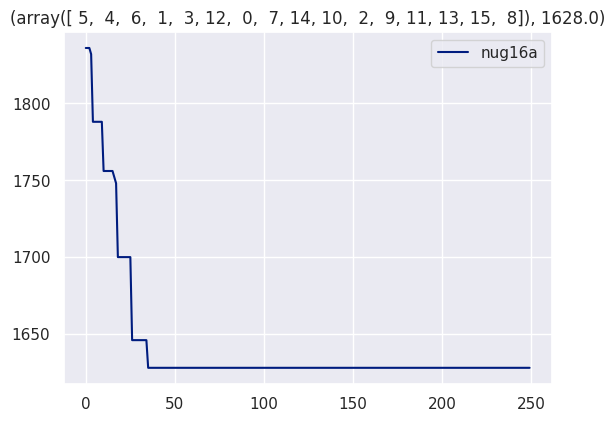

Problem size: 16
Flow matrix:
 (16, 16)
Distance matrix:
 (16, 16)


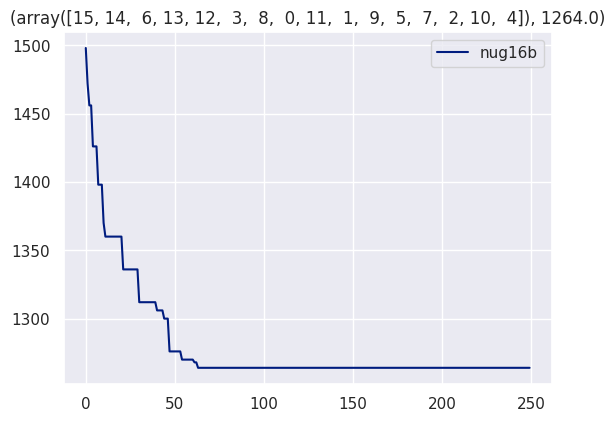

Problem size: 17
Flow matrix:
 (17, 17)
Distance matrix:
 (17, 17)


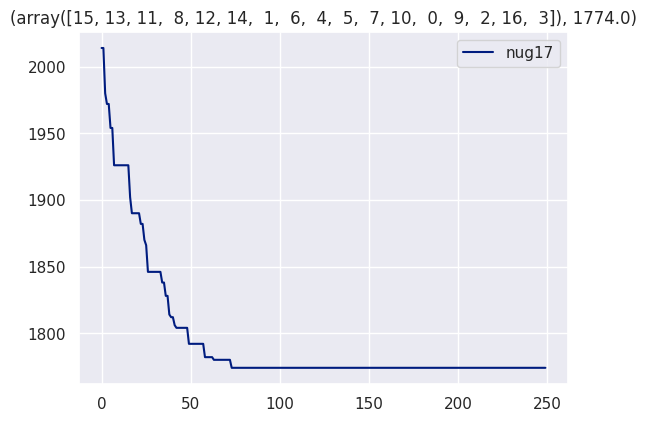

Problem size: 18
Flow matrix:
 (18, 18)
Distance matrix:
 (18, 18)


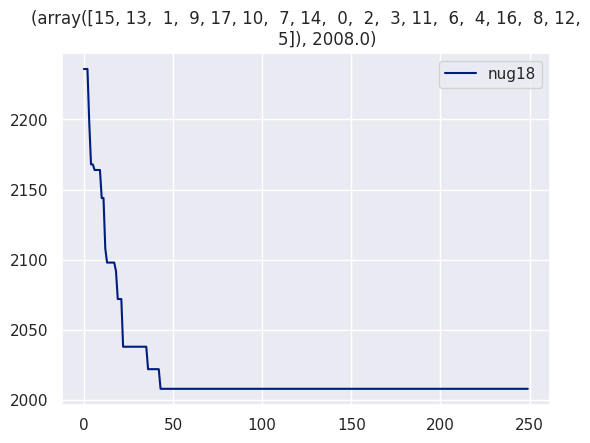

Problem size: 20
Flow matrix:
 (20, 20)
Distance matrix:
 (20, 20)


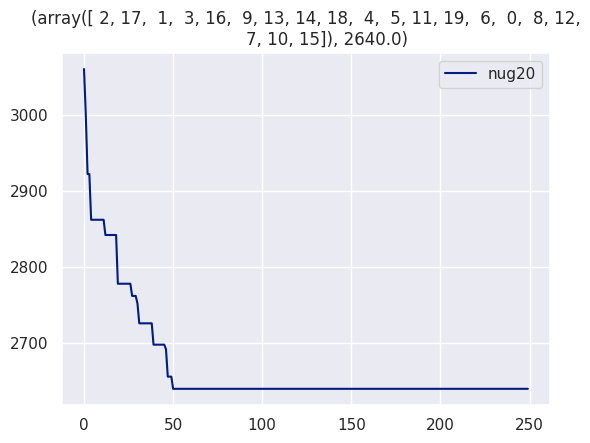

Problem size: 21
Flow matrix:
 (21, 21)
Distance matrix:
 (21, 21)


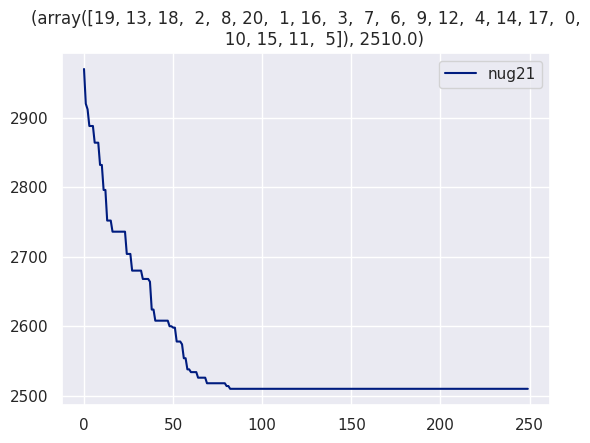

Problem size: 22
Flow matrix:
 (22, 22)
Distance matrix:
 (22, 22)


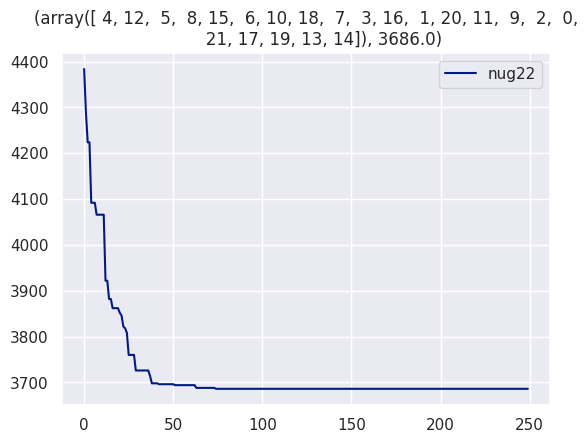

Problem size: 24
Flow matrix:
 (24, 24)
Distance matrix:
 (24, 24)


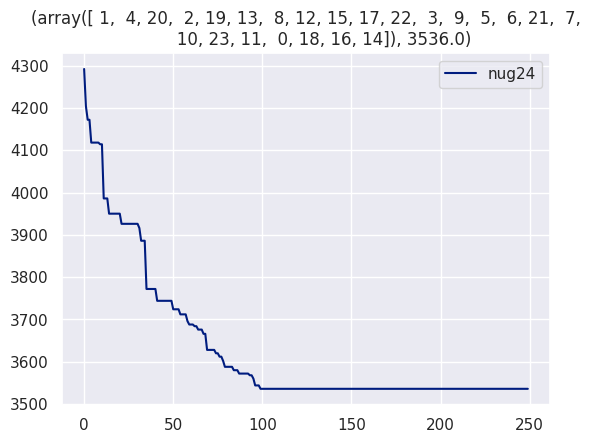

Problem size: 25
Flow matrix:
 (25, 25)
Distance matrix:
 (25, 25)


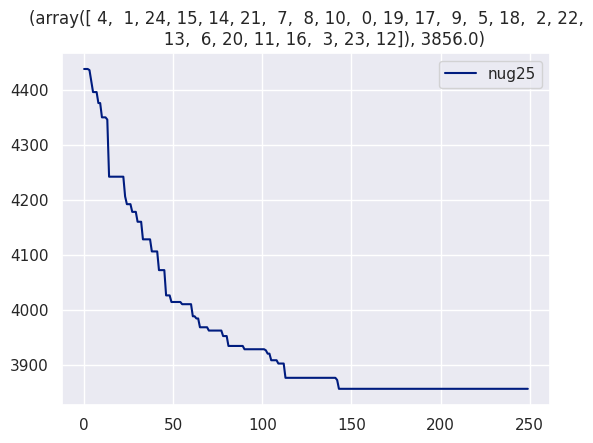

Problem size: 27
Flow matrix:
 (27, 27)
Distance matrix:
 (27, 27)


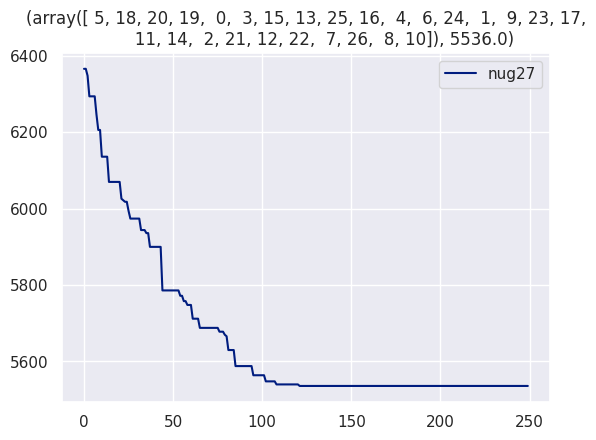

Problem size: 30
Flow matrix:
 (30, 30)
Distance matrix:
 (30, 30)


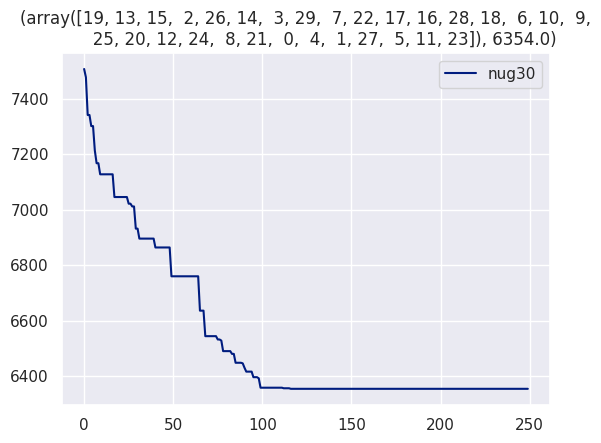

Problem size: 50
Flow matrix:
 (50, 50)
Distance matrix:
 (50, 50)


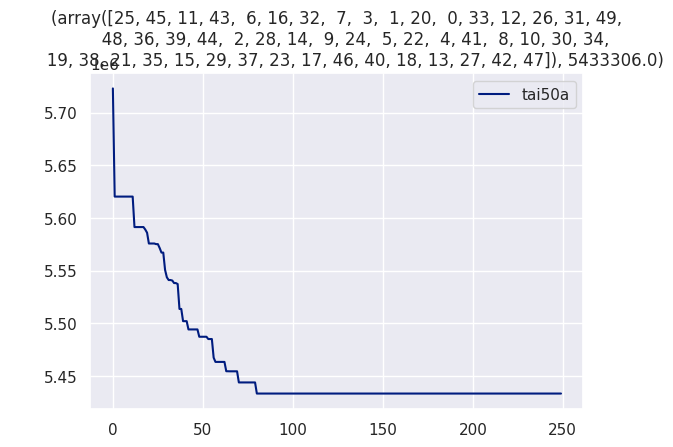

Problem size: 60
Flow matrix:
 (60, 60)
Distance matrix:
 (60, 60)


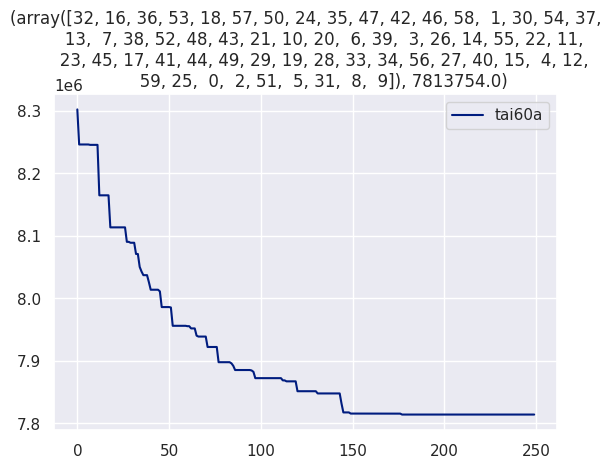

Problem size: 80
Flow matrix:
 (80, 80)
Distance matrix:
 (80, 80)


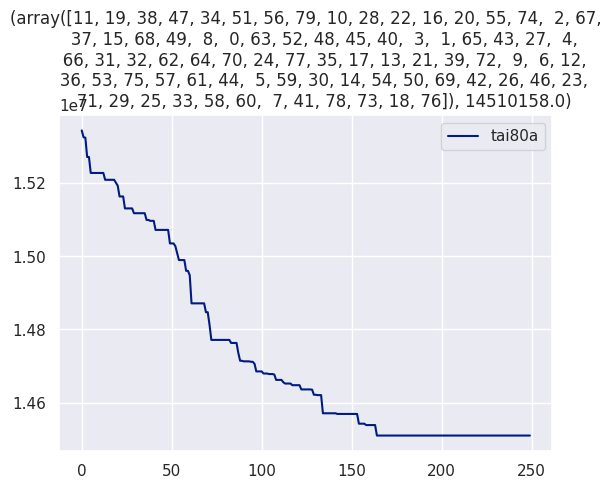

<Figure size 640x480 with 0 Axes>

In [5]:
for instance_key in instances:
	n, qap_objective_function = load_problem_instance(QAPLIB_URL + instance_key + ".dat")
	res = instances[instance_key] = list(simple_genetic_algorithm(
		n, Crossover.PMX, Mutation.reverse_sequence_mutation, qap_objective_function,
		mutation_probability = 0.9
	))
	utils.quickplot([x[1] for x in res], legend=[instance_key], title=res[-1])

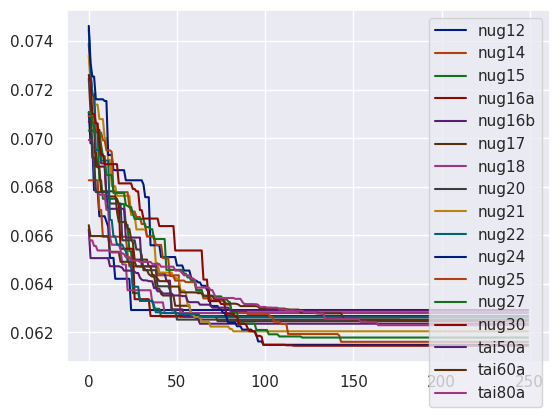

<Figure size 640x480 with 0 Axes>

In [37]:
def normalize(v):
	v = np.array(v)
	norm = np.linalg.norm(v)
	if norm == 0: 
		return v
	return v / norm

x = [normalize([v for c, v in inst]) for inst in instances.values()]
utils.quickplot(*x, legend=list(instances.keys()))

Problem size: 12
Flow matrix:
 (12, 12)
Distance matrix:
 (12, 12)
Problem size: 14
Flow matrix:
 (14, 14)
Distance matrix:
 (14, 14)
Problem size: 15
Flow matrix:
 (15, 15)
Distance matrix:
 (15, 15)
Problem size: 16
Flow matrix:
 (16, 16)
Distance matrix:
 (16, 16)
Problem size: 16
Flow matrix:
 (16, 16)
Distance matrix:
 (16, 16)
Problem size: 17
Flow matrix:
 (17, 17)
Distance matrix:
 (17, 17)
Problem size: 18
Flow matrix:
 (18, 18)
Distance matrix:
 (18, 18)
Problem size: 20
Flow matrix:
 (20, 20)
Distance matrix:
 (20, 20)
Problem size: 21
Flow matrix:
 (21, 21)
Distance matrix:
 (21, 21)
Problem size: 22
Flow matrix:
 (22, 22)
Distance matrix:
 (22, 22)
Problem size: 24
Flow matrix:
 (24, 24)
Distance matrix:
 (24, 24)
Problem size: 25
Flow matrix:
 (25, 25)
Distance matrix:
 (25, 25)
Problem size: 27
Flow matrix:
 (27, 27)
Distance matrix:
 (27, 27)
Problem size: 30
Flow matrix:
 (30, 30)
Distance matrix:
 (30, 30)
Problem size: 50
Flow matrix:
 (50, 50)
Distance matrix:
 (50,

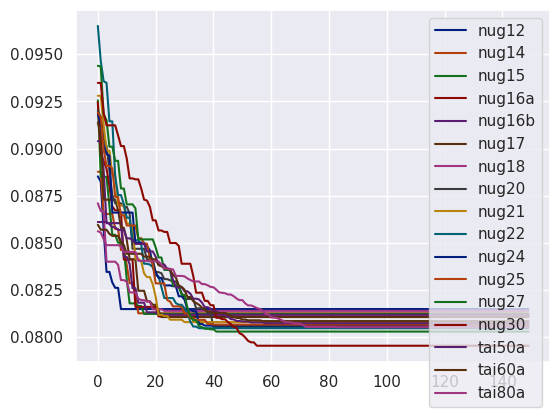

<Figure size 640x480 with 0 Axes>

In [38]:
for instance_key in instances:
	n, qap_objective_function = load_problem_instance(QAPLIB_URL + instance_key + ".dat")
	res = instances[instance_key] = list(simple_genetic_algorithm(
		n, Crossover.PMX, Mutation.reverse_sequence_mutation, qap_objective_function,
		steps = 150,
		population=5000
	))

x = [normalize([v for c, v in inst]) for inst in instances.values()]
utils.quickplot(*x, legend=list(instances.keys()))